<a href="https://colab.research.google.com/github/Cloudy34/AI_Projects/blob/main/Lab1_145538.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

graph = {
    'A': {'O':151,'D':43},
    'B': {'G':171},
    'C': {'B':171,'D':126},
    'D': {'M':200,'F':111,'O':136},
    'E': {'A':133,'L':110},
    'F': {'H':130,'G':88},
    'G': {'H':99,'C':140,'D':123},
    'H': {'N':80},
    'I': {'A':109,'C':102},
    'J': {'E':105,'I':172,'K':146},
    'K': {'L':152,'E':146},
    'L': {'O':97},
    'M': {'N':67},
    'N': {},
    'O':{'M':100},
}

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque

In [ ]:
def visualise_w(weighted_graph):
    plt.figure(figsize=(10, 10))

    G = nx.Graph()
    for node in weighted_graph:
        for neighbour in weighted_graph[node]:
            G.add_edge(node, neighbour, weight=weighted_graph[node][neighbour])
    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw(G, pos, node_color='#aaa', edge_color='black', width=2, edge_cmap=plt.cm.Blues, with_labels=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()

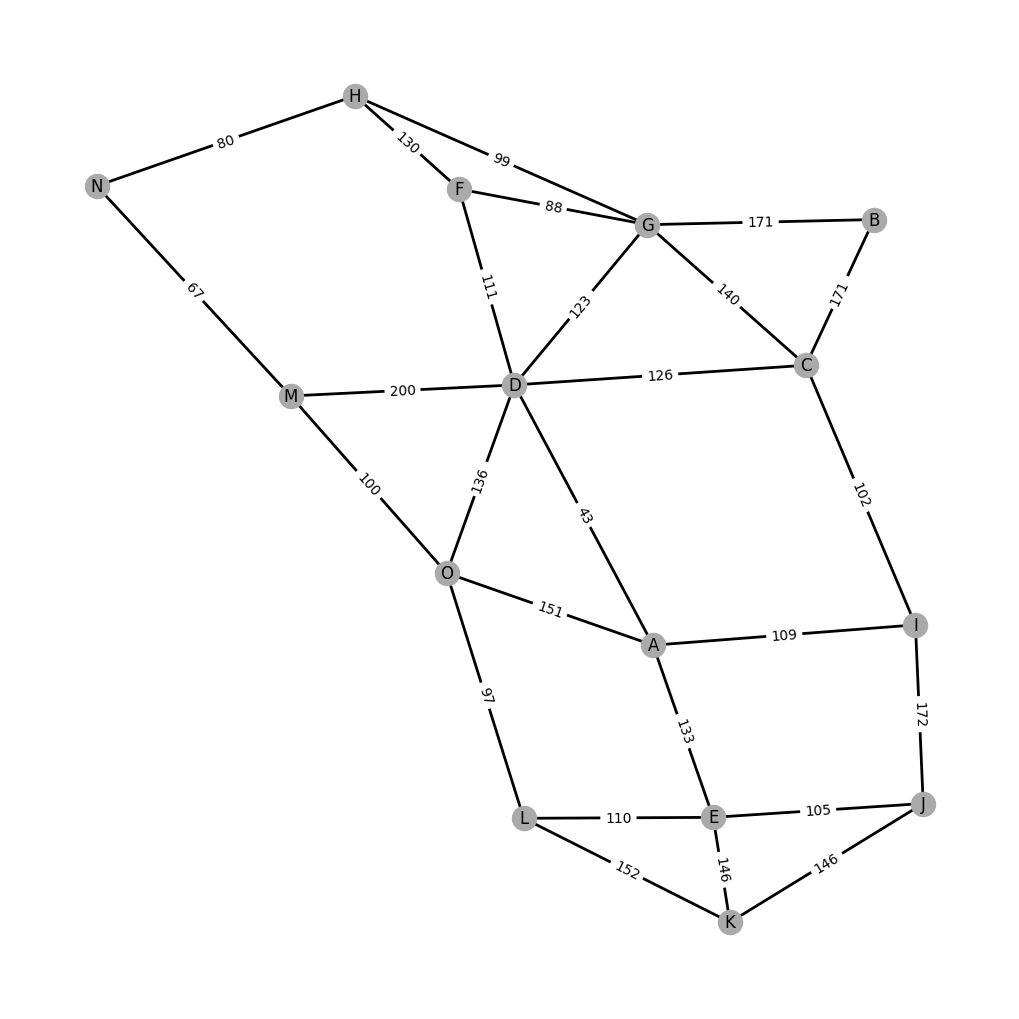

In [ ]:
visualise_w(graph)

In [ ]:
#Breadth first search
def bfs(graph, start, goal):
    explored = set()
    queue = [(start, [start])]

    while queue:
        node, path = queue.pop(0)
        if node == goal:
            return path
        for neighbor in graph.get(node, {}):
            if neighbor not in explored:
                explored.add(neighbor)
                queue.append((neighbor, path + [neighbor]))
    return None

In [ ]:
#Uniform cost search
def ucs(graph, start, goal):
    queue = [(0, start, [start])]

    while queue:
        cost, node, path = queue.pop(0)
        if node == goal:
            return path
        neighbors = graph.get(node, {})
        for neighbor, edge_cost in neighbors.items():
            new_cost = cost + edge_cost
            queue.append((new_cost, neighbor, path + [neighbor]))
        queue.sort()

    return None

In [ ]:
#Iterative deepening depth-first search
def iddfs(graph, start, goal, max_depth):
    def dfs(node, path, depth):
        if depth > max_depth:
            return None
        if node == goal:
            return path
        if depth == 0:
            return None
        for neighbor in graph.get(node, {}):
            result = dfs(neighbor, path + [neighbor], depth - 1)
            if result is not None:
                return result
        return None

    for depth in range(max_depth + 1):
        result = dfs(start, [start], depth)
        if result is not None:
            return result

    return None

In [ ]:
start_node = 'J'
goal_node = 'N'
bfs_path = bfs(graph, start_node, goal_node)
if bfs_path:
    print(f'Breadth-First Search: {" -> ".join(bfs_path)}')
else:
    print('Path not found')

ucs_path = ucs(graph, start_node, goal_node)
if ucs_path:
    print(f'Uniform Cost Search: {" -> ".join(ucs_path)}')
else:
    print('Path not found')

max_depth = 10
iddfs_path = iddfs(graph, start_node, goal_node, max_depth)
if iddfs_path:
    print(f'Iterative Deepening DFS (Depth {max_depth}): {" -> ".join(iddfs_path)}')
else:
    print(f'Iterative Deepening DFS (Depth {max_depth}): Path not found')

Breadth-First Search: J -> E -> A -> O -> M -> N
Uniform Cost Search: J -> E -> L -> O -> M -> N
Iterative Deepening DFS (Depth 10): J -> E -> A -> O -> M -> N
